In [21]:
# Group number 1
# 
# Team members: Stepan Perminov, Polina Ponomareva, Kirill Shcherbakov, Daniil Svirskiy

# Library importing
import numpy as np
import matplotlib.pyplot as plt

# Size of the trajectory
n = 200

Error_filt = np.zeros((2,n,500))

for k in range(500):

    # Initialization of arrays
    x = np.zeros((n,1))
    V = np.zeros((n,1))
    z = np.zeros((n,1))

    x[0] = 5
    V[0] = 1
    T = 1

    # Variances
    sigma_a2 = 0.2**2
    sigma_et2 = 20**2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a = np.random.normal(0, np.sqrt(sigma_a2), n-1)
    et = np.random.normal(0, np.sqrt(sigma_et2), n)

    # Generation of V
    for i in range(1,len(V)):
        V[i] = V[i-1] + a[i-1]*T

    # Generation of true trajectory x
    for i in range(1,len(x)):
        x[i] = x[i-1] + V[i-1]*T + a[i-1]*T*T/2

    # Generation of measurements z of the process X
    for i in range(len(z)):
        z[i] = x[i] + et[i]





    F = np.array([[1, T],[0, 1]])
    G = np.array([[(T**2)/2.0],[T]])
    H = np.array([1, 0])

    # X = np.zeros((2,n))
    Z = np.zeros((2,n))

    X = np.array([[5],[1]])

    X_ = X
    # Generation of true trajectory X
    for i in range(1,len(a)+1):
        X = np.hstack((X, F.dot(X_) + G*a[i-1]))
        X_ = F.dot(X_) + G*a[i-1]
    # print(X)






    Q = G*G.T*sigma_a2

    R = sigma_et2

    P_1 = np.zeros((2,2,n))
    X_1 = np.zeros((2,n))

    P_ = np.zeros((2,2,n))
    P_[:,:,0] = [[100, 0],[0, 100]]

    X_ = np.zeros((2,n))
    X_[:,0] = [2, 0]

    HT = H.reshape(2,1)
    K = np.zeros((2,n))

    for i in range(1,n):
        P_1[:,:,i] = (F.dot(P_[:,:,i-1])).dot(F.T) + Q

        X_1[:,i] = F.dot(X_[:,i-1].reshape(2,1)).reshape(2)
        K[:,i] = ((P_1[:,:,i].dot(HT))/((H.dot(P_1[:,:,i])).dot(HT) + R)).reshape(2)

        X_[:,i] = X_1[:,i] + K[:,i]*(z[i] - H.dot(X_1[:,i]))
        P_[:,:,i] = P_1[:,:,i] - (K[:,i].reshape(2,1)*H).dot(P_1[:,:,i])

    K = np.delete(K, 0, axis = 1)




    # Task 7

    X__1 = np.zeros((2,n+6))

    for i in range(n):
        X__1[:,i+6] = F.dot(F).dot(F).dot(F).dot(F).dot(F).dot(X_[:,i].reshape(2,1)).reshape(2)
    
    Error_filt[:,:,k] = (X - X_)**2


In [22]:
Final_err_filt = np.sqrt(np.sum(Error_filt, axis = 2)/(500.0-1.0))

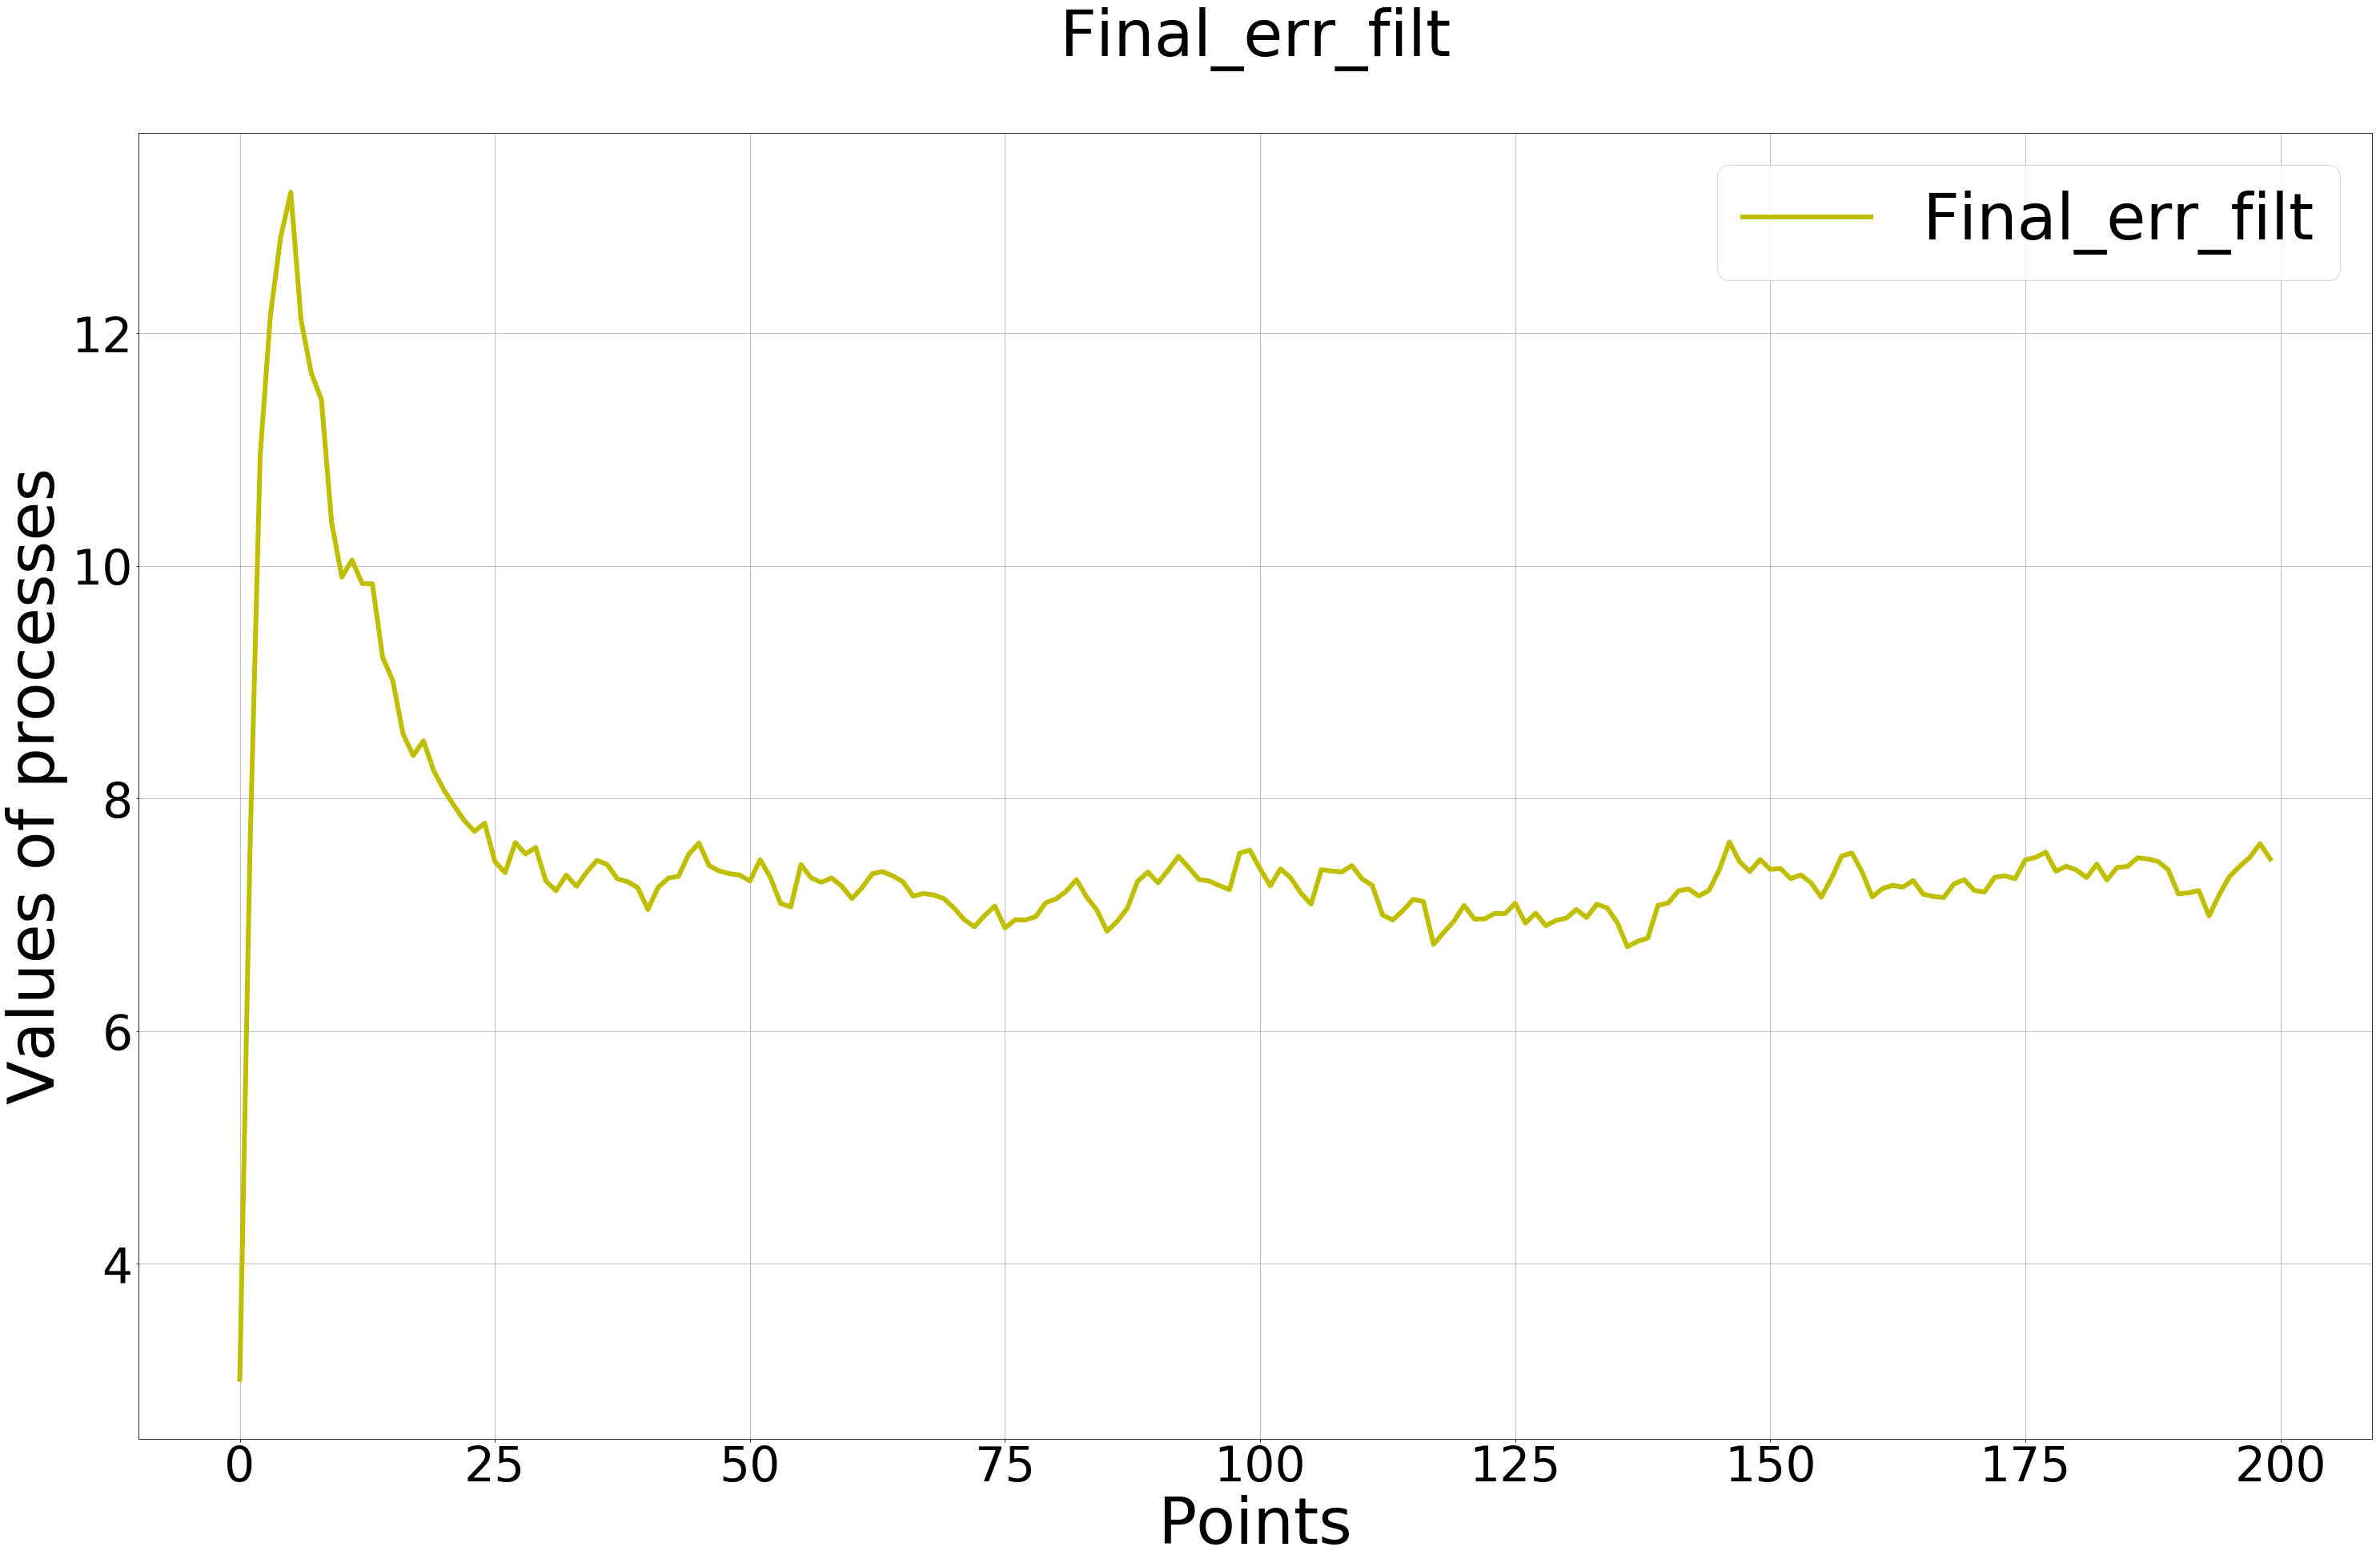

In [23]:
# Plotting of measurements, true values of process, running mean and exponential mean
plt.plot(Final_err_filt[0,:], linewidth = 6, label = "Final_err_filt", color = "y")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Final_err_filt\n", fontsize = 80)
plt.show()

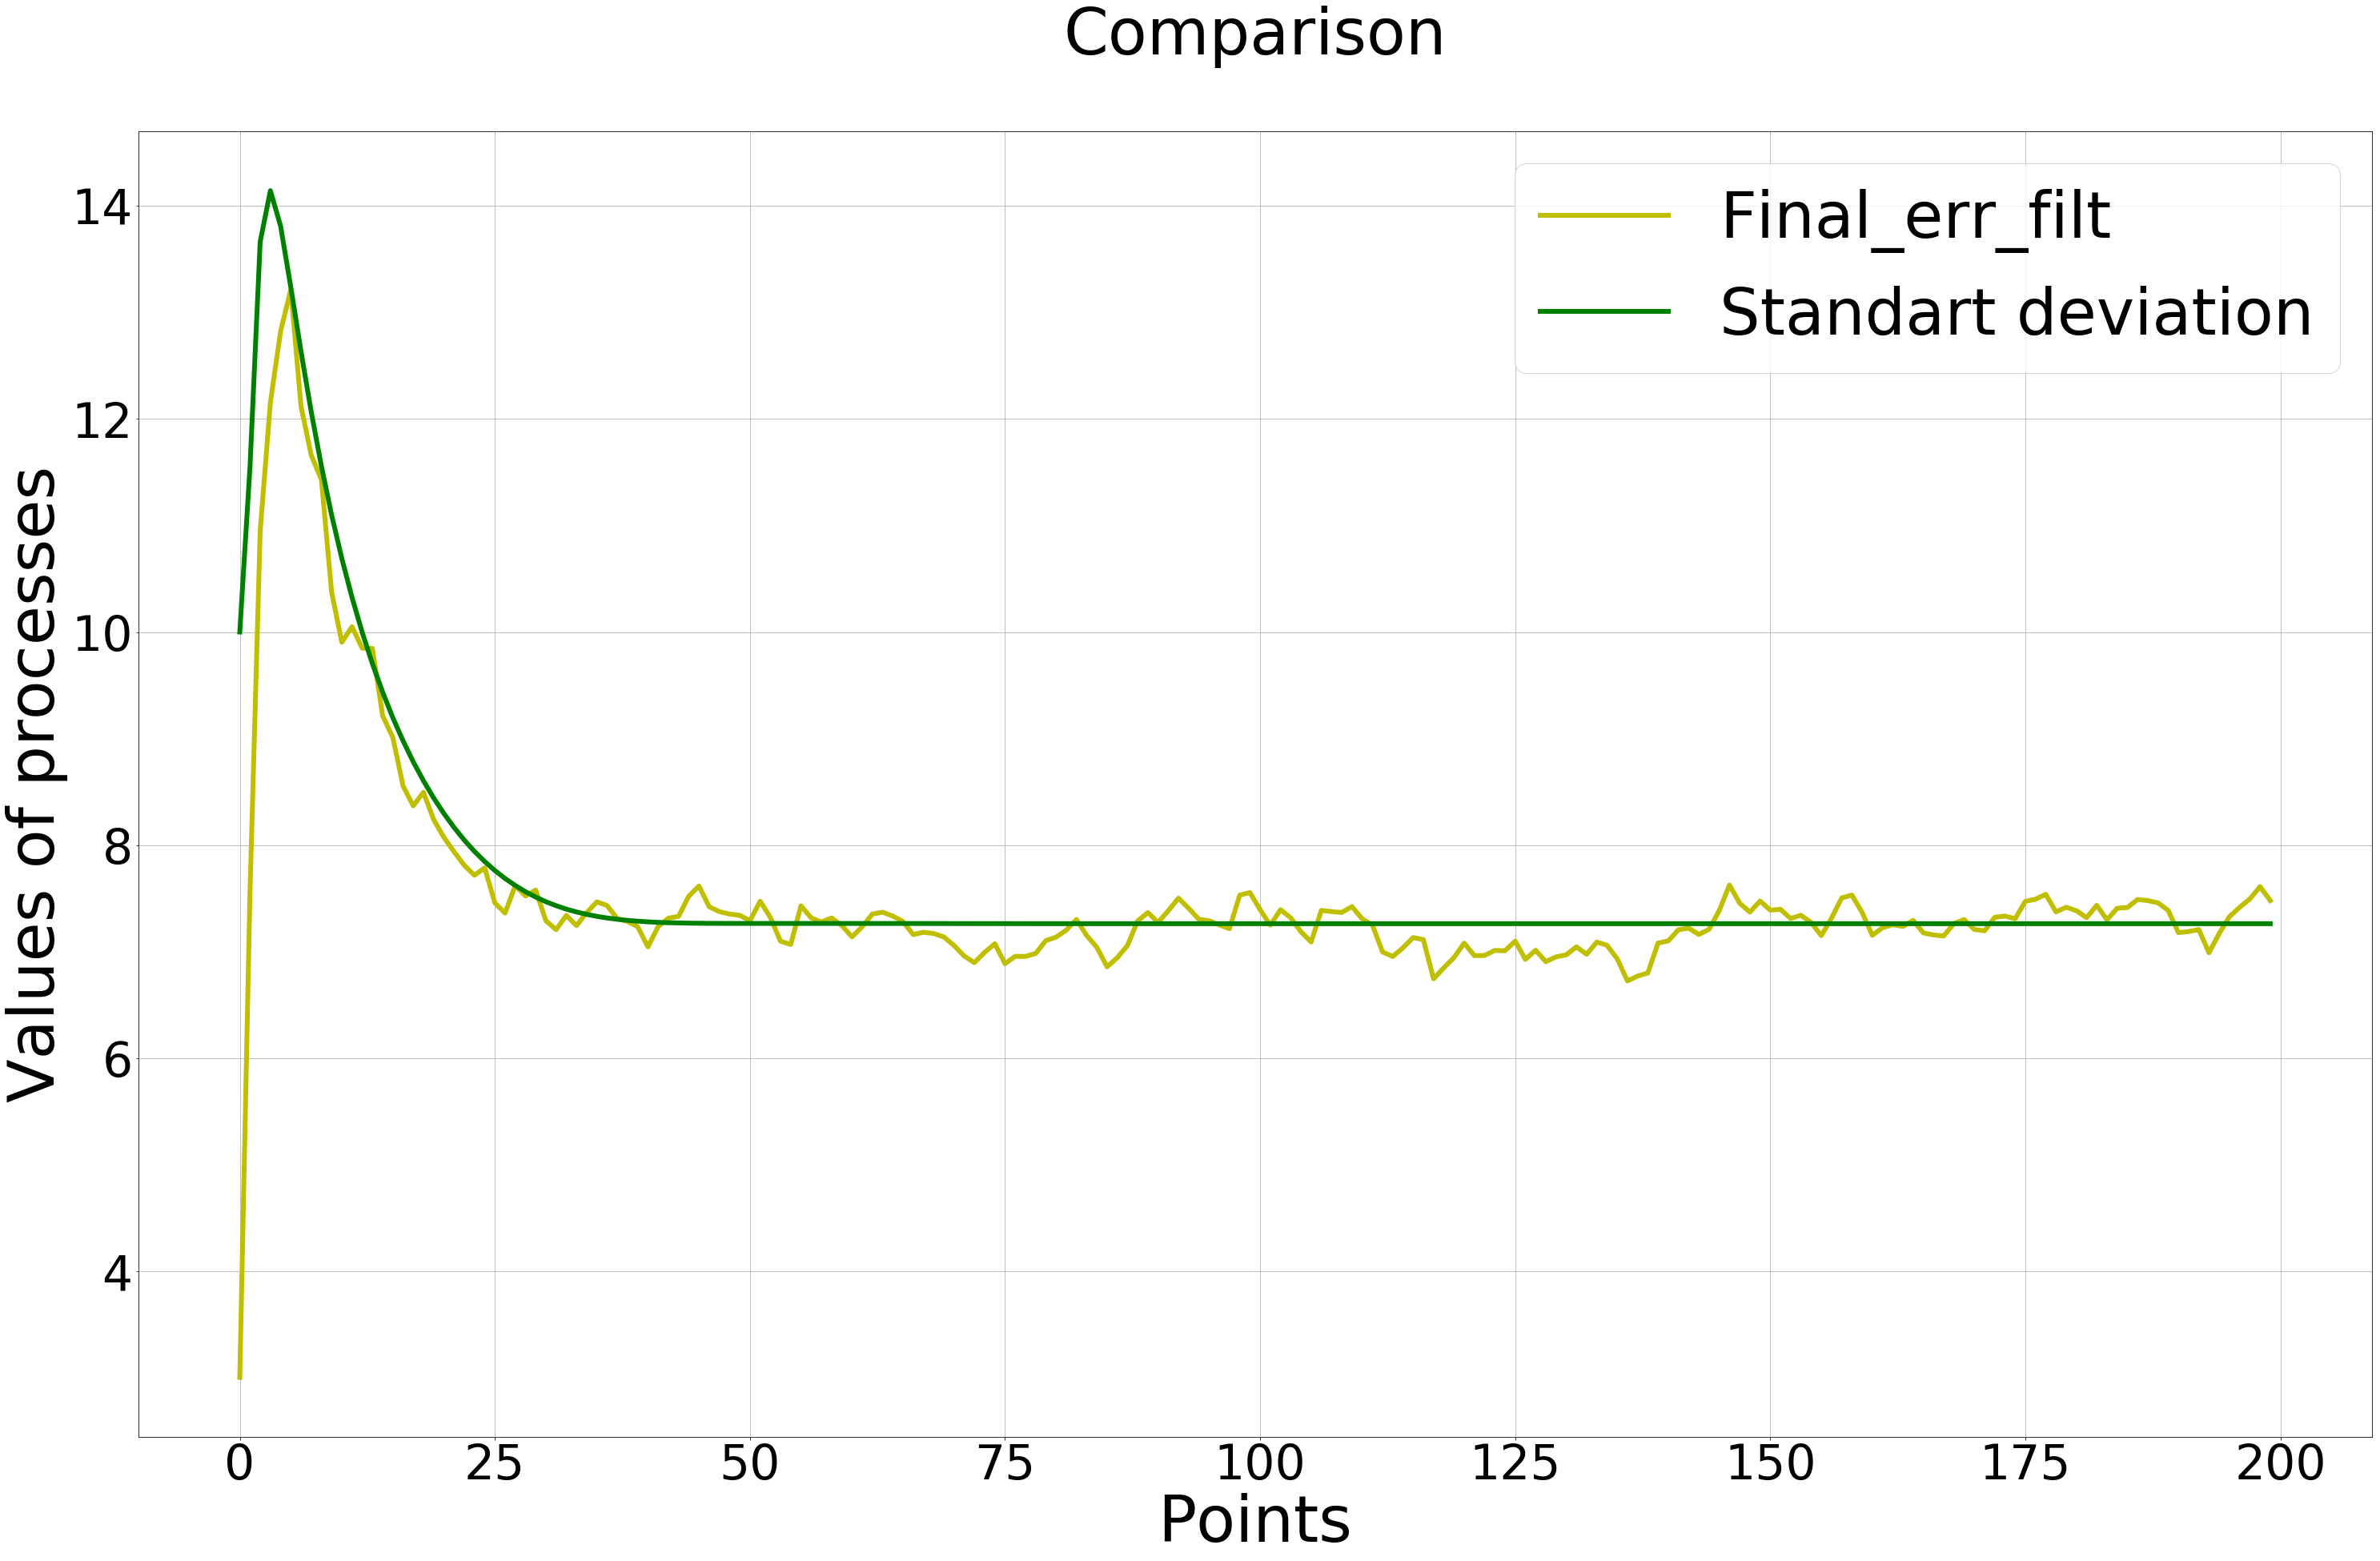

In [24]:
# Task 11

plt.plot(Final_err_filt[0,:], linewidth = 6, label = "Final_err_filt", color = "y")
plt.plot(np.sqrt(P_[0,0,:]), linewidth = 6, label = "Standart deviation", color = "g")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Comparison\n", fontsize = 80)
plt.show()